In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

from sklearn import metrics

from manual_review_classifier.ClassifierPlots import create_reliability_diagram

sns.set_style("white")
sns.set_context('poster')

In [3]:
training_data = pd.read_pickle('../data/training_data.pkl')

In [4]:
# Get Labels
three_class = training_data.replace('g', 'f')
Y = pd.get_dummies(three_class.call).astype(float).values

In [5]:
threeclass_relu_probs = np.load('../data/deep_learning/threeclass_relu_probs.npy')

In [6]:
logr_probs = np.load('../data/log_reg/threeclass_relu_probs.npy')

In [7]:
forest = np.load('../data/random_forest/100estimators.npy')

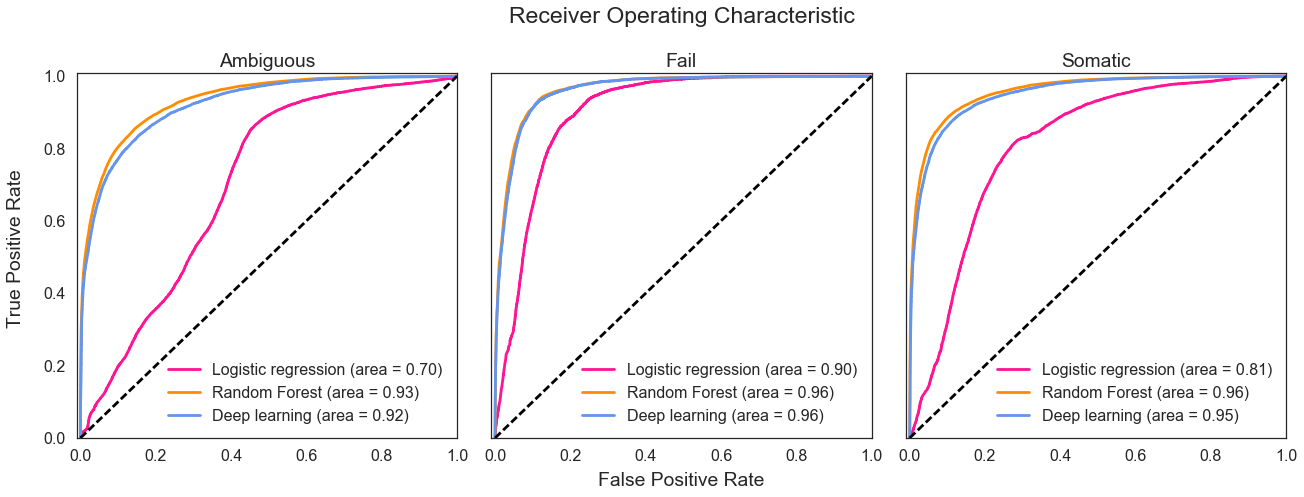

In [9]:
n_classes = Y.shape[1]
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}
dl_fpr = dict()
dl_tpr = dict()
dl_roc_auc = dict()
lr_fpr = dict()
lr_tpr = dict()
lr_roc_auc = dict()
rf_fpr = dict()
rf_tpr = dict()
rf_roc_auc = dict()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
fig, axes = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(21, 7))
fig.suptitle('Receiver Operating Characteristic')
ax_array = axes.flatten()
for i, color in zip(range(n_classes), colors):
    lr_fpr[i], lr_tpr[i], _ = metrics.roc_curve(Y[:, i], logr_probs[:, i])
    lr_roc_auc[i] = metrics.auc(lr_fpr[i], lr_tpr[i])
    ax_array[i].plot(lr_fpr[i], lr_tpr[i], color='deeppink', label='Logistic regression'
             ' (area = {0:0.2f})'.format(lr_roc_auc[i]))
    rf_fpr[i], rf_tpr[i], _ = metrics.roc_curve(Y[:, i], forest[:, i])
    rf_roc_auc[i] = metrics.auc(rf_fpr[i], rf_tpr[i])
    ax_array[i].plot(rf_fpr[i], rf_tpr[i], color='darkorange', label='Random Forest'
             ' (area = {0:0.2f})'.format(rf_roc_auc[i]))
    dl_fpr[i], dl_tpr[i], _ = metrics.roc_curve(Y[:, i], threeclass_relu_probs[:, i])
    dl_roc_auc[i] = metrics.auc(dl_fpr[i], dl_tpr[i])
    ax_array[i].plot(dl_fpr[i], dl_tpr[i], color='cornflowerblue', label='Deep learning'
             ' (area = {0:0.2f})'.format(dl_roc_auc[i]))
    ax_array[i].set_title(class_lookup[i])
    ax_array[i].plot([0, 1], [0, 1], 'k--')
    ax_array[i].legend(loc="lower right")
    ax_array[i].set_xlim([-0.01, 1.0])
    ax_array[i].set_ylim([0.0, 1.01])
# ax.xlabel('False Positive Rate')
# ax.ylabel('True Positive Rate')
fig.text(0.5, 0.04, 'False Positive Rate', ha='center', va='center')
fig.text(0.06, 0.5, 'True Positive Rate', ha='center', va='center', rotation='vertical')

plt.subplots_adjust(left=0.1, top=.85, wspace=.09)
plt.show()